# QRT Challenge

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
import warnings
warnings.filterwarnings('ignore')

from scipy.stats import spearmanr

# configure plot font size
SMALL_SIZE = 6
MEDIUM_SIZE = 7
BIGGER_SIZE = 8
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)    # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

# configure plot style
plt.style.use('seaborn-whitegrid')

In [2]:
# read the data
raw_X_train = pd.read_csv('./x_train.csv')
raw_y_train = pd.read_csv('./y_train.csv')

raw_X_train.head()

,ID,DAY_ID,COUNTRY,DE_CONSUMPTION,FR_CONSUMPTION,DE_FR_EXCHANGE,FR_DE_EXCHANGE,DE_NET_EXPORT,FR_NET_EXPORT,DE_NET_IMPORT,...,FR_RESIDUAL_LOAD,DE_RAIN,FR_RAIN,DE_WIND,FR_WIND,DE_TEMP,FR_TEMP,GAS_RET,COAL_RET,CARBON_RET
0,1054,206,FR,0.210099,-0.427458,-0.606523,0.606523,NaN,0.692860,NaN,...,-0.444661,-0.172680,-0.556356,-0.790823,-0.283160,-1.069070,-0.063404,0.339041,0.124552,-0.002445
1,2049,501,FR,-0.022399,-1.003452,-0.022063,0.022063,-0.573520,-1.130838,0.573520,...,-1.183194,-1.240300,-0.770457,1.522331,0.828412,0.437419,1.831241,-0.659091,0.047114,-0.490365
2,1924,687,FR,1.395035,1.978665,1.021305,-1.021305,-0.622021,-1.682587,0.622021,...,1.947273,-0.480700,-0.313338,0.431134,0.487608,0.684884,0.114836,0.535974,0.743338,0.204952
3,297,720,DE,-0.983324,-0.849198,-0.839586,0.839586,-0.270870,0.563230,0.270870,...,-0.976974,-1.114838,-0.507570,-0.499409,-0.236249,0.350938,-0.417514,0.911652,-0.296168,1.073948
4,1101,818,FR,0.143807,-0.617038,-0.924990,0.924990,NaN,0.990324,NaN,...,-0.526267,-0.541465,-0.424550,-1.088158,-1.011560,0.614338,0.729495,0.245109,1.526606,2.614378


In [3]:
raw_y_train.head()

,ID,TARGET
0,1054,0.028313
1,2049,-0.112516
2,1924,-0.180840
3,297,-0.260356
4,1101,-0.071733


In [4]:
# print the shape of the data
print('The shape of the X_train data is: {}'.format(raw_X_train.shape))
print('The shape of the y_train data is: {}'.format(raw_y_train.shape))

# print the number of rows containing NaN values
print('The number of rows containing NaN values in X_train is: {}'.format(raw_X_train.isnull().any(axis=1).sum()))

The shape of the X_train data is: (1494, 35)
The shape of the y_train data is: (1494, 2)
The number of rows containing NaN values in X_train is: 218


In [5]:
raw_X_test = pd.read_csv('./x_test.csv')
raw_X_test.head()

,ID,DAY_ID,COUNTRY,DE_CONSUMPTION,FR_CONSUMPTION,DE_FR_EXCHANGE,FR_DE_EXCHANGE,DE_NET_EXPORT,FR_NET_EXPORT,DE_NET_IMPORT,...,FR_RESIDUAL_LOAD,DE_RAIN,FR_RAIN,DE_WIND,FR_WIND,DE_TEMP,FR_TEMP,GAS_RET,COAL_RET,CARBON_RET
0,1115,241,FR,0.340083,-0.433604,-0.423521,0.423521,0.165333,0.519419,-0.165333,...,-0.222525,-0.513180,-0.182048,-0.982546,-0.876632,0.880491,0.692242,0.569419,-0.029697,-0.929256
1,1202,1214,FR,0.803209,0.780411,0.601610,-0.601610,0.342802,0.555367,-0.342802,...,0.857739,-0.340595,-0.301094,-0.759816,-1.221443,-0.616617,-0.737496,0.251251,0.753646,0.664086
2,1194,1047,FR,0.795540,0.721954,1.179158,-1.179158,1.620928,0.666901,-1.620928,...,0.447967,0.796475,-0.367248,0.376055,-0.483363,0.865138,0.120079,-1.485642,-0.326450,-0.349747
3,1084,1139,FR,0.172555,-0.723427,-0.044539,0.044539,NaN,-0.205276,NaN,...,-0.561295,-0.542606,-0.013291,-0.791119,-0.894309,0.239153,0.457457,-0.746863,2.262654,0.642069
4,1135,842,FR,0.949714,0.420236,0.617391,-0.617391,0.608561,-0.240856,-0.608561,...,0.503567,-0.230291,-0.609203,-0.744986,-1.196282,0.176557,0.312557,-2.219626,-0.509272,-0.488341


In [6]:
# merge the X_train and y_train data
raw_train = pd.merge(raw_X_train, raw_y_train, on='ID')
raw_train.head()

,ID,DAY_ID,COUNTRY,DE_CONSUMPTION,FR_CONSUMPTION,DE_FR_EXCHANGE,FR_DE_EXCHANGE,DE_NET_EXPORT,FR_NET_EXPORT,DE_NET_IMPORT,...,DE_RAIN,FR_RAIN,DE_WIND,FR_WIND,DE_TEMP,FR_TEMP,GAS_RET,COAL_RET,CARBON_RET,TARGET
0,1054,206,FR,0.210099,-0.427458,-0.606523,0.606523,NaN,0.692860,NaN,...,-0.172680,-0.556356,-0.790823,-0.283160,-1.069070,-0.063404,0.339041,0.124552,-0.002445,0.028313
1,2049,501,FR,-0.022399,-1.003452,-0.022063,0.022063,-0.573520,-1.130838,0.573520,...,-1.240300,-0.770457,1.522331,0.828412,0.437419,1.831241,-0.659091,0.047114,-0.490365,-0.112516
2,1924,687,FR,1.395035,1.978665,1.021305,-1.021305,-0.622021,-1.682587,0.622021,...,-0.480700,-0.313338,0.431134,0.487608,0.684884,0.114836,0.535974,0.743338,0.204952,-0.180840
3,297,720,DE,-0.983324,-0.849198,-0.839586,0.839586,-0.270870,0.563230,0.270870,...,-1.114838,-0.507570,-0.499409,-0.236249,0.350938,-0.417514,0.911652,-0.296168,1.073948,-0.260356
4,1101,818,FR,0.143807,-0.617038,-0.924990,0.924990,NaN,0.990324,NaN,...,-0.541465,-0.424550,-1.088158,-1.011560,0.614338,0.729495,0.245109,1.526606,2.614378,-0.071733


In [7]:
# sort data by ID and then by Date
raw_train = raw_train.sort_values(['DAY_ID'])
raw_train.head()

,ID,DAY_ID,COUNTRY,DE_CONSUMPTION,FR_CONSUMPTION,DE_FR_EXCHANGE,FR_DE_EXCHANGE,DE_NET_EXPORT,FR_NET_EXPORT,DE_NET_IMPORT,...,DE_RAIN,FR_RAIN,DE_WIND,FR_WIND,DE_TEMP,FR_TEMP,GAS_RET,COAL_RET,CARBON_RET,TARGET
742,1057,0,FR,0.048418,-0.465067,-0.079296,0.079296,NaN,0.650577,NaN,...,-0.987968,-0.856204,-0.655528,-1.099226,0.279885,0.583874,-1.071996,-0.074767,0.798003,0.108953
1211,1179,1,FR,0.966997,1.222131,0.331356,-0.331356,0.405549,0.778627,-0.405549,...,-0.370990,-0.497520,-1.184018,-1.465608,1.349212,0.231602,1.480313,0.931562,0.822047,-0.063369
1408,1327,2,FR,-0.068972,-0.667390,-1.102015,1.102015,-1.080403,0.256736,1.080403,...,-0.344600,-0.372156,-0.623041,-0.926064,-0.148950,0.641235,1.802550,1.140920,0.900434,2.575976
1468,111,2,DE,-0.068972,-0.667390,-1.102015,1.102015,-1.080403,0.256736,1.080403,...,-0.344600,-0.372156,-0.623041,-0.926064,-0.148950,0.641235,1.802550,1.140920,0.900434,0.861270
329,2016,3,FR,-0.134670,-0.834564,-1.051716,1.051716,-1.881881,-0.612133,1.881881,...,-1.394561,-1.118297,0.244859,0.488650,-1.710888,-0.951057,0.440121,-0.064550,-0.032756,0.068905


In [8]:
# print the coloumns names
print(raw_train.columns)

# count the number of column names start with 'DE' and 'FR'
print('The number of column names start with DE is: {}'.format(raw_train.columns.str.startswith('DE').sum()))  
print('The number of column names start with FR is: {}'.format(raw_train.columns.str.startswith('FR').sum()))

Index(['ID', 'DAY_ID', 'COUNTRY', 'DE_CONSUMPTION', 'FR_CONSUMPTION',
       'DE_FR_EXCHANGE', 'FR_DE_EXCHANGE', 'DE_NET_EXPORT', 'FR_NET_EXPORT',
       'DE_NET_IMPORT', 'FR_NET_IMPORT', 'DE_GAS', 'FR_GAS', 'DE_COAL',
       'FR_COAL', 'DE_HYDRO', 'FR_HYDRO', 'DE_NUCLEAR', 'FR_NUCLEAR',
       'DE_SOLAR', 'FR_SOLAR', 'DE_WINDPOW', 'FR_WINDPOW', 'DE_LIGNITE',
       'DE_RESIDUAL_LOAD', 'FR_RESIDUAL_LOAD', 'DE_RAIN', 'FR_RAIN', 'DE_WIND',
       'FR_WIND', 'DE_TEMP', 'FR_TEMP', 'GAS_RET', 'COAL_RET', 'CARBON_RET',
       'TARGET'],
      dtype='object')
The number of column names start with DE is: 15
The number of column names start with FR is: 14


## Data Preprocessing

### Fill the NaN data with mean of the column

In [10]:
from sklearn.experimental import enable_iterative_imputer  # noqa
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor

# Assume df is your DataFrame with missing values in some columns

# Create the IterativeImputer model with a Random Forest estimator
imputer = IterativeImputer(estimator=RandomForestRegressor(n_estimators=100),
                           max_iter=10, random_state=0)

# Fit the imputer model on the dataset to learn the imputation model
temp = raw_train.copy()
# change country code to numeric
temp['COUNTRY'] = temp['COUNTRY'].replace({'DE': -1, 'FR': 1})
imputer.fit(temp)

# Perform imputation to fill in the missing values
df_imputed = imputer.transform(temp)

# If you want to put the imputed data back into a DataFrame (to keep column names etc.)
df_imputed = pd.DataFrame(df_imputed, columns=temp.columns)







# fill the NaN values with the mean of the column
filled_train = raw_train.fillna(raw_train.mean())
filled_train.head()

# check if there are still NaN values
print('The number of rows containing NaN values in filled_train is: {}'.format(filled_train.isnull().any(axis=1).sum()))

# check duplicates in the data
print('The number of duplicates in the data is: {}'.format(filled_train.duplicated().sum()))

The number of rows containing NaN values in filled_train is: 0
The number of duplicates in the data is: 0


In [14]:
filled_train = df_imputed.copy()
filled_train['COUNTRY'] = filled_train['COUNTRY'].replace({-1: 'DE', 1: 'FR'})

### Split the data by country

In [15]:
from sklearn.preprocessing import StandardScaler

# split the data by value of the column 'COUNTRY'
raw_train_DE = filled_train[filled_train['COUNTRY']=='DE']
raw_train_FR = filled_train[filled_train['COUNTRY']=='FR']

# drop the columns which has name start with 'DE' in raw_train_FR
raw_train_FR = raw_train_FR.drop(raw_train_FR.columns[raw_train_FR.columns.str.startswith('DE')], axis=1)

# drop the columns of 'ID', 'COUNTRY' and 'DAY_ID'
raw_train_DE = raw_train_DE.drop(['ID', 'COUNTRY', 'DAY_ID'], axis=1)
# raw_train_FR.head()

# drop the columns which has name start with 'FR' in raw_train_DE
raw_train_DE = raw_train_DE.drop(raw_train_DE.columns[raw_train_DE.columns.str.startswith('FR')], axis=1)

# drop the columns of 'ID', 'COUNTRY' and 'DAY_ID'
raw_train_FR = raw_train_FR.drop(['ID', 'COUNTRY', 'DAY_ID'], axis=1)
# raw_train_DE.head()
scalor = StandardScaler()
normalized_train_FR = pd.DataFrame(scalor.fit_transform(raw_train_FR), columns=raw_train_FR.columns, index=raw_train_FR.index)
normalized_train_DE = pd.DataFrame(scalor.fit_transform(raw_train_DE), columns=raw_train_DE.columns, index=raw_train_DE.index)

# print the shape of the data
print('The shape of the raw_train_DE data is: {}'.format(raw_train_DE.shape))
print('The shape of the raw_train_FR data is: {}'.format(raw_train_FR.shape))

The shape of the raw_train_DE data is: (643, 19)
The shape of the raw_train_FR data is: (851, 18)


In [16]:
normalized_train_FR

,FR_CONSUMPTION,FR_DE_EXCHANGE,FR_NET_EXPORT,FR_NET_IMPORT,FR_GAS,FR_COAL,FR_HYDRO,FR_NUCLEAR,FR_SOLAR,FR_WINDPOW,FR_RESIDUAL_LOAD,FR_RAIN,FR_WIND,FR_TEMP,GAS_RET,COAL_RET,CARBON_RET,TARGET
0,-0.529194,-0.048864,0.673324,-0.673552,-0.712159,0.915689,0.486911,-0.025217,0.605411,-1.053637,-0.279334,-0.879136,-1.104407,0.596541,-1.018985,-0.138225,0.659895,0.061518
1,1.260904,-0.485223,0.799483,-0.799709,1.722982,-0.746024,0.517776,1.733844,-0.054370,-0.455178,1.411308,-0.524909,-1.463417,0.239130,1.319951,0.827076,0.681835,-0.106946
2,-0.743856,1.037878,0.285301,-0.285531,0.066046,-0.709076,-1.038187,-0.047538,0.461275,-1.027792,-0.491815,-0.401103,-0.934729,0.654739,1.615250,1.027898,0.753360,2.473285
4,-0.921226,0.984430,-0.570733,0.570496,-0.354484,-0.618282,-0.519641,-1.261538,2.305274,-0.920710,-0.834152,-1.137971,0.451519,-0.960779,0.366720,-0.128425,-0.098146,0.022366
6,-0.534821,-0.286792,-1.752288,1.752042,0.141687,-0.707491,-0.533389,-1.551691,2.719806,-0.854050,-0.505085,-0.813824,-0.005871,1.485188,-0.144721,0.461485,0.645175,0.963214
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1486,-0.788015,-0.587892,-1.620955,1.620710,-0.235104,-0.693386,-0.517064,-1.589732,0.488548,-0.707292,-0.628042,2.594496,0.590232,-1.455946,0.230720,0.478796,0.292845,0.087986
1488,1.344647,-1.796681,-0.031178,0.032995,0.564511,1.052464,0.717993,1.384404,-0.191602,0.572233,1.220769,-0.233683,-0.481605,-0.388623,-0.413788,1.635834,0.879488,-0.066274
1489,-0.588014,0.154326,-0.745800,0.745561,0.246961,-0.727699,-1.015521,-1.115112,0.987104,-0.535717,-0.545089,-0.268055,1.074039,-0.308577,-0.020316,0.002719,-0.214975,-0.460940
1492,1.357584,0.351556,-0.035843,0.035610,1.245870,0.186424,1.679357,0.597872,-0.857630,1.649784,1.036114,0.399091,-0.259528,0.169587,-0.131585,-0.673706,0.127745,-2.981702


In [17]:
normalized_train_DE

,DE_CONSUMPTION,DE_FR_EXCHANGE,DE_NET_EXPORT,DE_NET_IMPORT,DE_GAS,DE_COAL,DE_HYDRO,DE_NUCLEAR,DE_SOLAR,DE_WINDPOW,DE_LIGNITE,DE_RESIDUAL_LOAD,DE_RAIN,DE_WIND,DE_TEMP,GAS_RET,COAL_RET,CARBON_RET,TARGET
3,-0.658459,-0.940896,-0.809374,0.809374,0.487736,0.010372,1.089236,0.755288,-0.449723,-0.538899,-0.029609,0.458759,-0.330074,-0.769600,-0.177105,1.556808,1.066451,0.737659,0.681725
5,-0.754852,-0.889974,-1.671308,1.671308,0.912712,-0.491340,1.281635,-1.588061,1.127744,-1.212706,0.353397,0.312663,-1.404675,0.029542,-1.886394,0.323906,-0.113770,-0.109706,6.681811
7,-0.994273,0.321155,-0.946904,0.946904,0.289372,0.237626,0.618452,-1.444492,2.069606,-0.978726,0.213457,-0.051115,-1.384407,0.111452,-0.082157,-0.181133,0.488332,0.629999,-0.116296
9,-0.472752,0.177018,-0.374711,0.374711,-0.504829,0.661321,-0.299997,-1.457667,1.243964,-0.964388,0.706102,0.155037,-0.521731,-0.104817,-0.902886,-0.418228,0.457028,-0.111418,-0.161795
10,-0.972109,1.500201,0.619321,-0.619321,0.166254,0.027492,-0.203401,-1.459697,0.888953,0.112392,0.257314,-0.615742,1.581067,1.360651,-0.497739,1.334896,0.092990,2.035678,-0.100409
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1480,-2.292337,-1.041110,-1.386164,1.386164,-1.022607,-1.395724,-0.458350,-0.805489,0.196157,-0.035614,-2.857613,-1.237932,-0.065061,-0.744380,0.029068,0.092828,0.201456,0.380480,-0.229226
1484,0.913570,0.834461,1.136315,-1.136315,-0.580958,-1.042389,-0.479727,0.032544,-0.072958,1.538127,-1.921155,-1.480337,0.870229,-0.063744,-0.427557,0.015405,1.663627,0.507447,-1.407560
1487,-0.488936,0.608022,-0.269495,0.269495,0.680250,0.421362,0.936900,-1.462136,1.686520,-0.679502,0.747548,0.166139,-1.230864,0.238883,1.152162,0.189608,0.505999,0.279383,-0.083792
1490,-0.624901,-0.099110,0.204204,-0.204204,-0.686944,-0.305483,-0.966822,-1.455300,1.432856,-0.374070,0.366083,-0.752810,-0.017691,1.054690,-0.788719,-0.058285,0.020084,-0.225966,-0.279451


## EDA

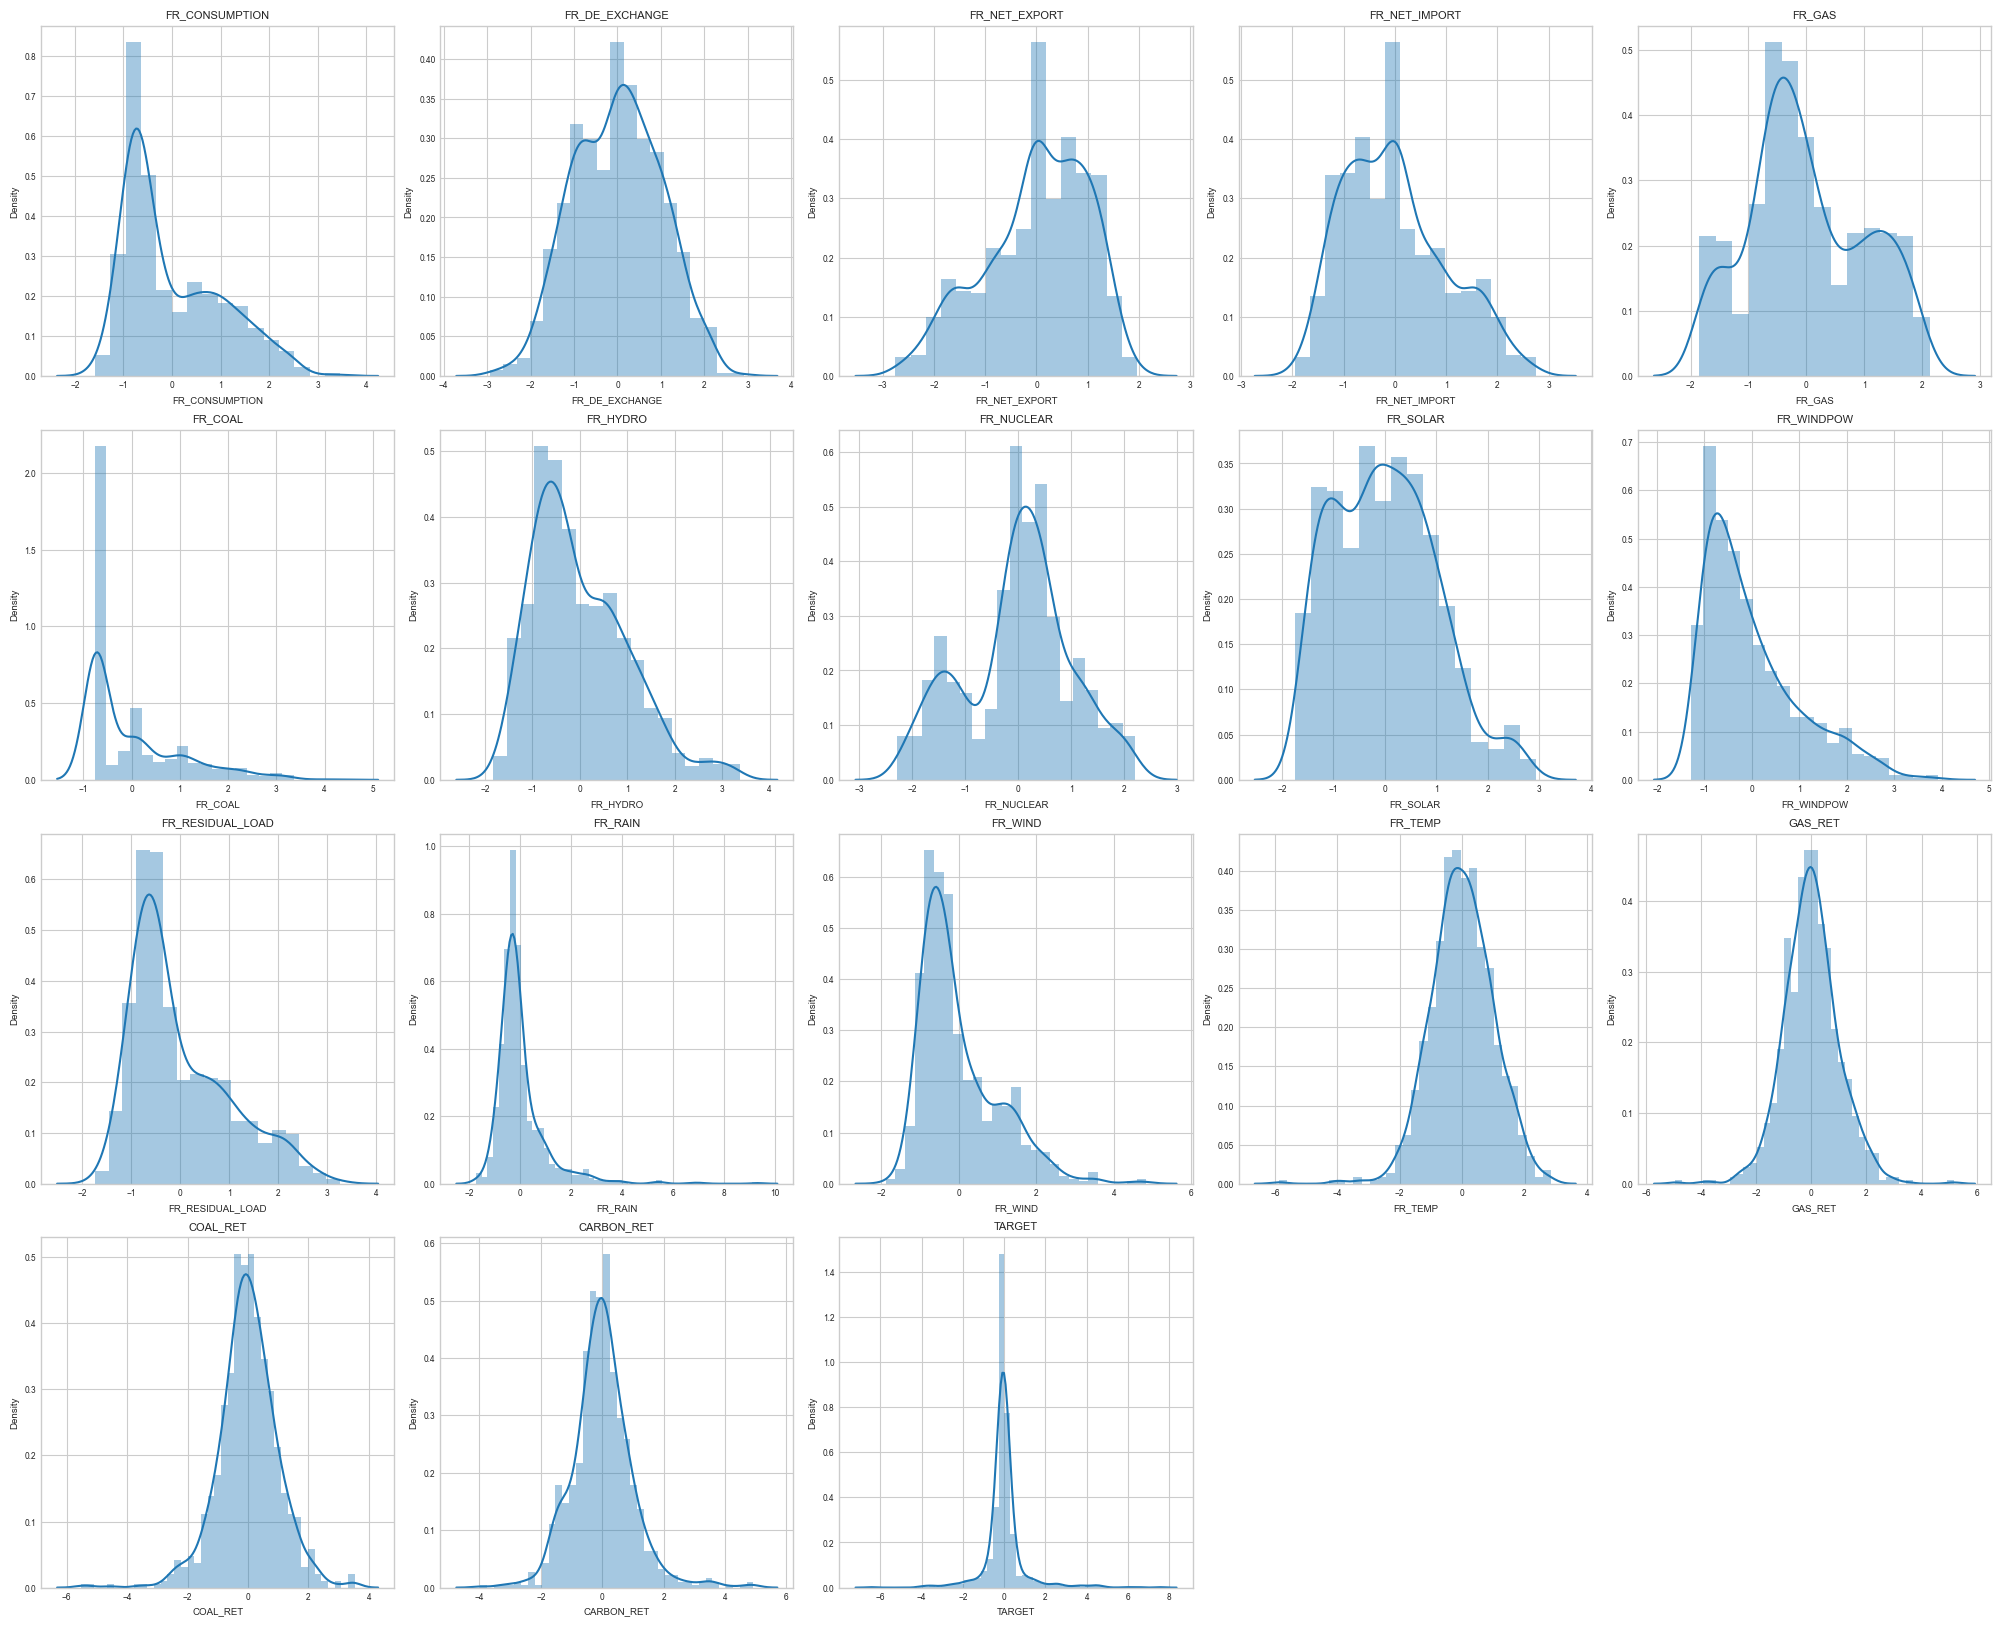

In [18]:
# visuliaze the distribution of the value of each column in normalized_train_FR with smaller granularity
plt.figure(figsize=(20, 20))
for i, col in enumerate(normalized_train_FR.columns):
    plt.subplot(5, 5, i+1)
    sns.distplot(normalized_train_FR[col])
    plt.title(col)
plt.tight_layout()
plt.show()

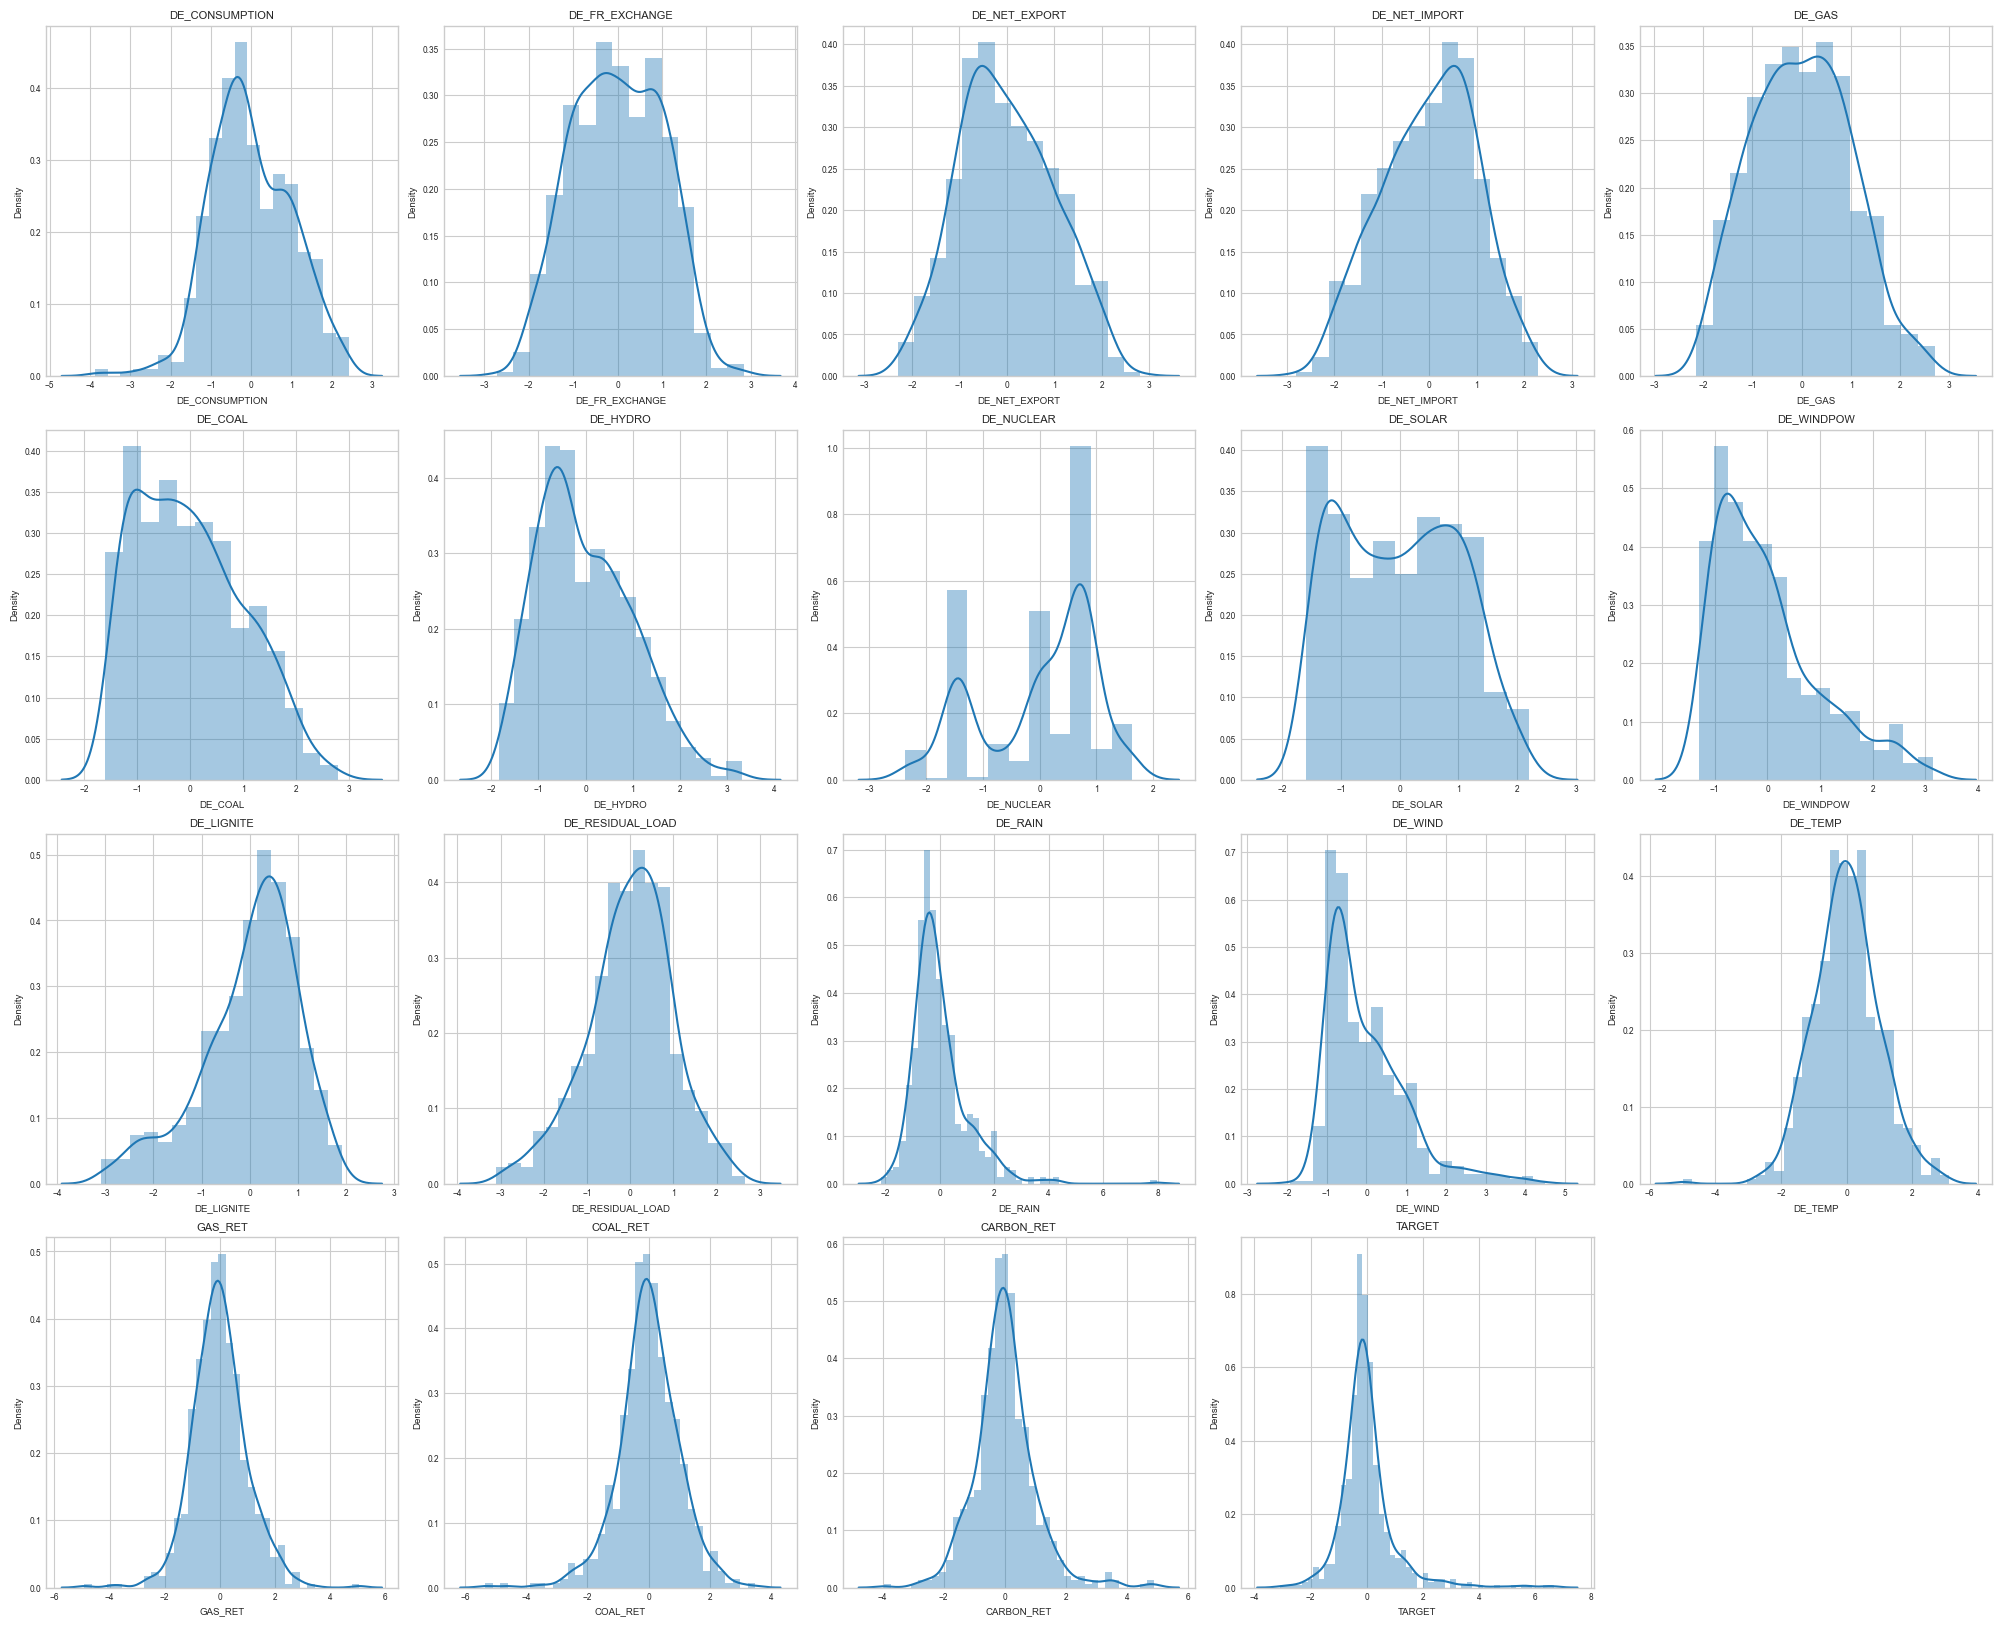

In [19]:
# visuliaze the distribution of the value of each column in normalized_train_DE with smaller granularity
plt.figure(figsize=(20, 20))
for i, col in enumerate(normalized_train_DE.columns):
    plt.subplot(5, 5, i+1)
    sns.distplot(normalized_train_DE[col])
    plt.title(col)
plt.tight_layout()
plt.show()

In [20]:
normalized_train_FR.var()

FR_CONSUMPTION      1.001176
FR_DE_EXCHANGE      1.001176
FR_NET_EXPORT       1.001176
FR_NET_IMPORT       1.001176
FR_GAS              1.001176
FR_COAL             1.001176
FR_HYDRO            1.001176
FR_NUCLEAR          1.001176
FR_SOLAR            1.001176
FR_WINDPOW          1.001176
FR_RESIDUAL_LOAD    1.001176
FR_RAIN             1.001176
FR_WIND             1.001176
FR_TEMP             1.001176
GAS_RET             1.001176
COAL_RET            1.001176
CARBON_RET          1.001176
TARGET              1.001176
dtype: float64

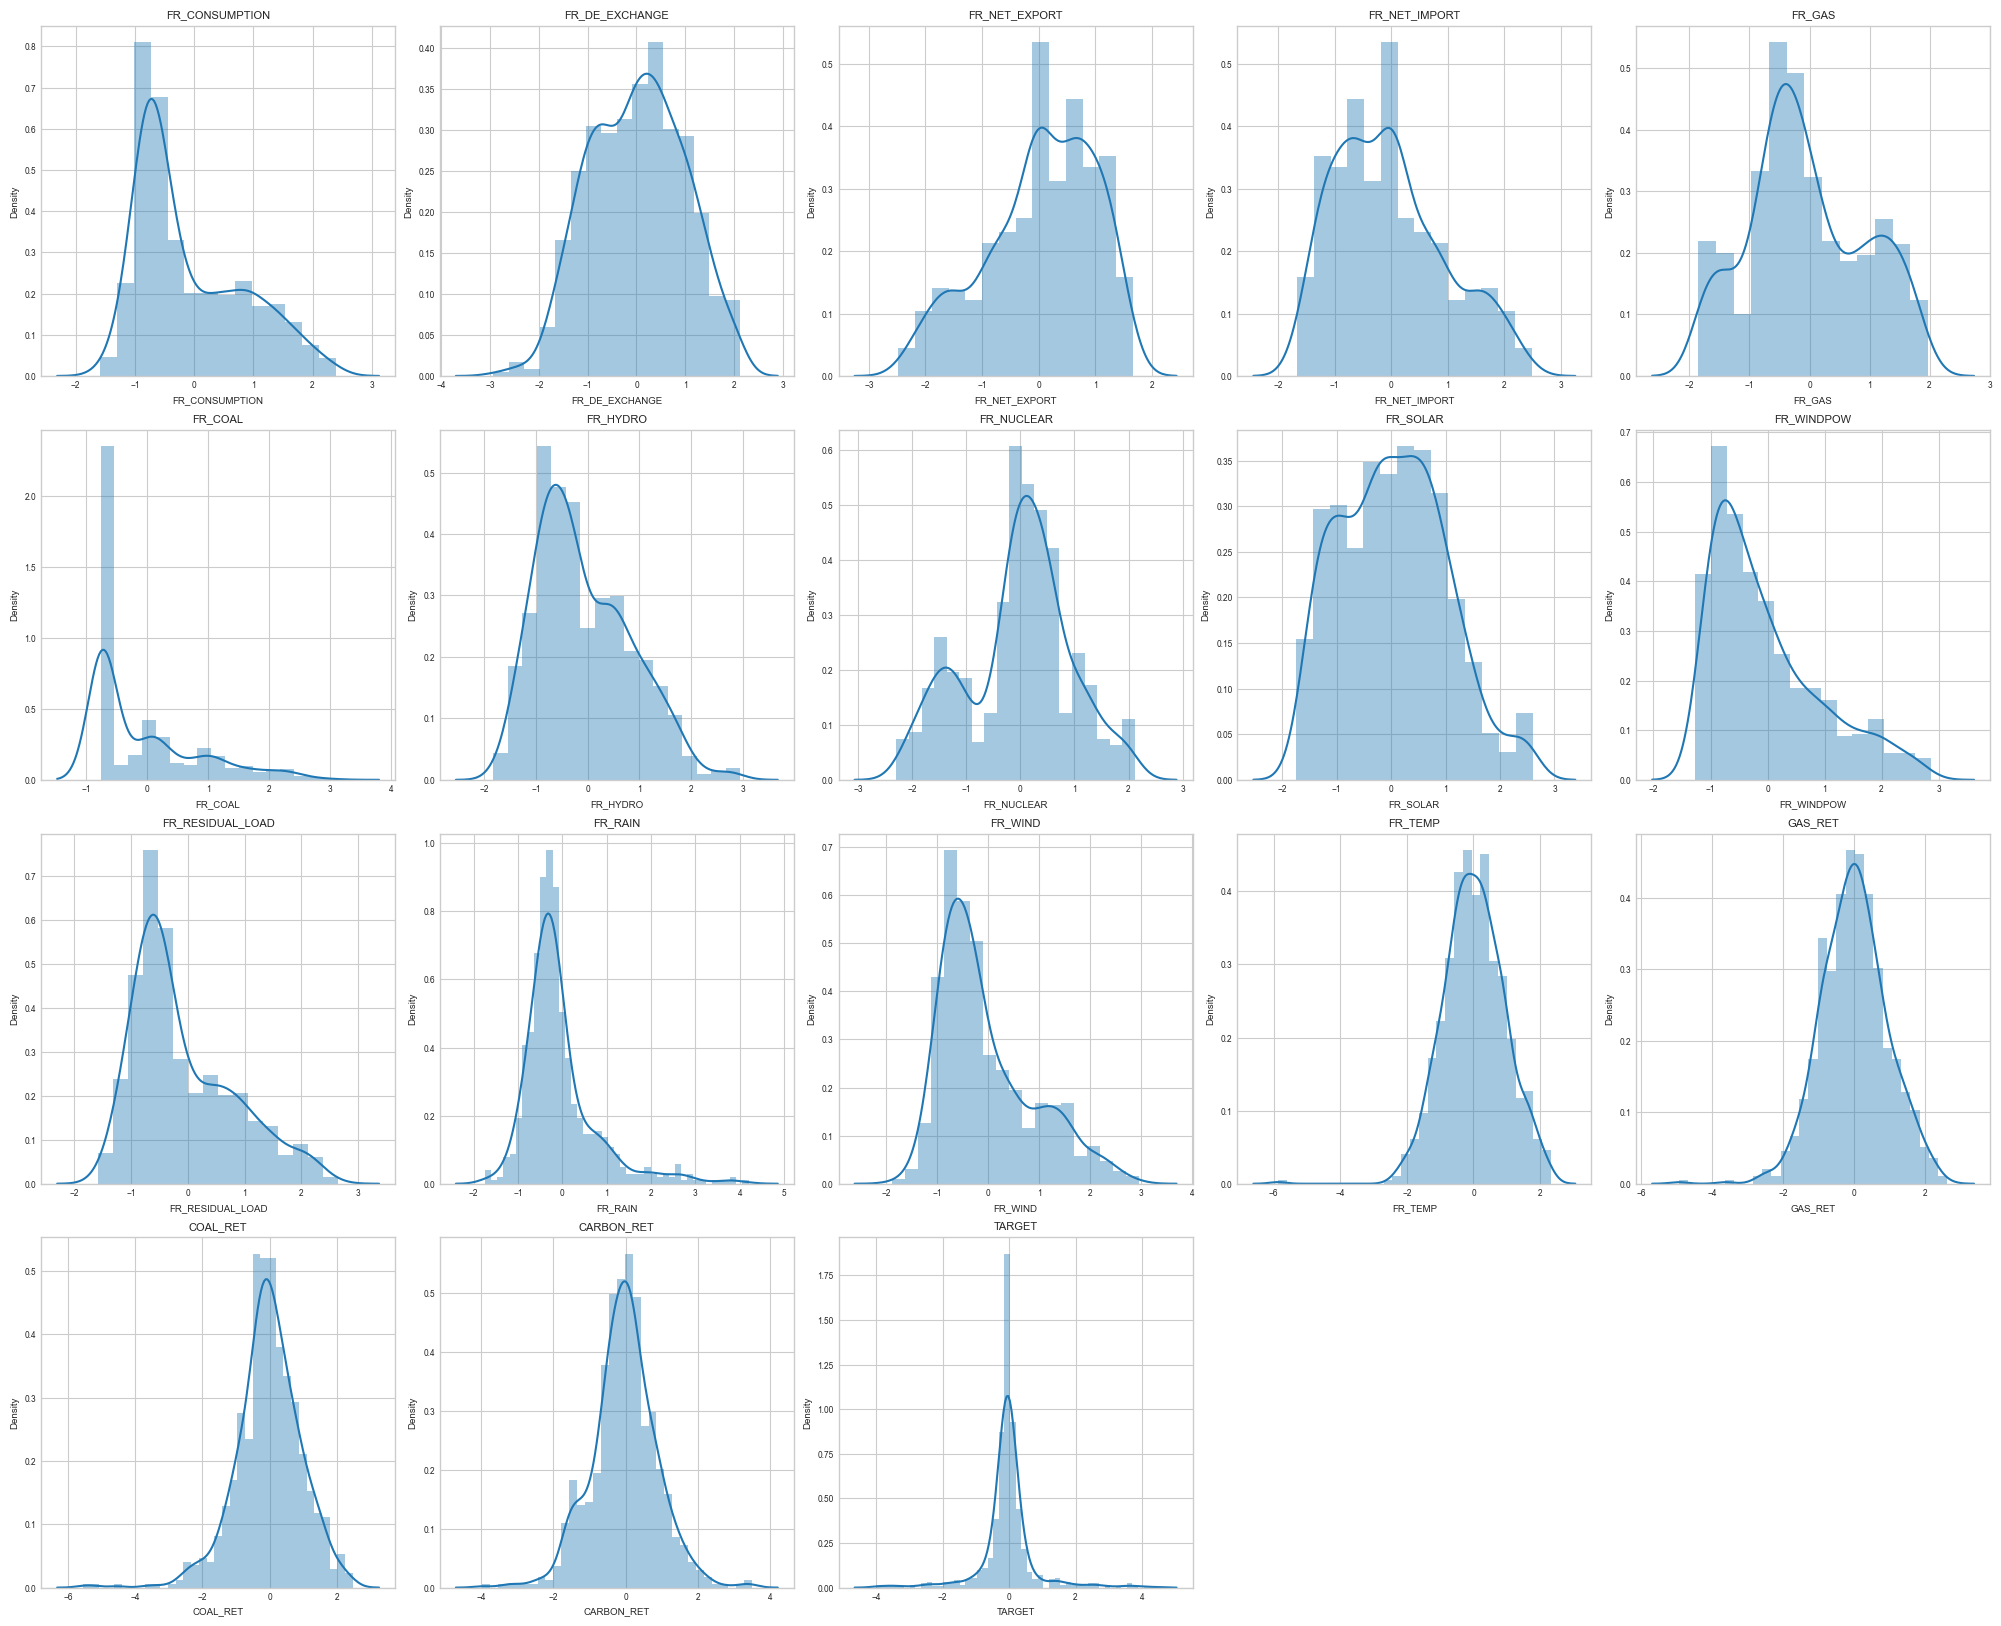

In [21]:
# if for each row, one of the value is the largest in the column, then remove this row

# remove the rows which has the outlier value in the column
outlier_train_FR = normalized_train_FR.drop(normalized_train_FR.idxmax(axis=0))
for i in range(5):
    outlier_train_FR = outlier_train_FR.drop(outlier_train_FR.idxmax(axis=0))
plt.figure(figsize=(20, 20))
for i, col in enumerate(outlier_train_FR.columns):
    plt.subplot(5, 5, i+1)
    sns.distplot(outlier_train_FR[col])
    plt.title(col)
plt.tight_layout()
plt.show()

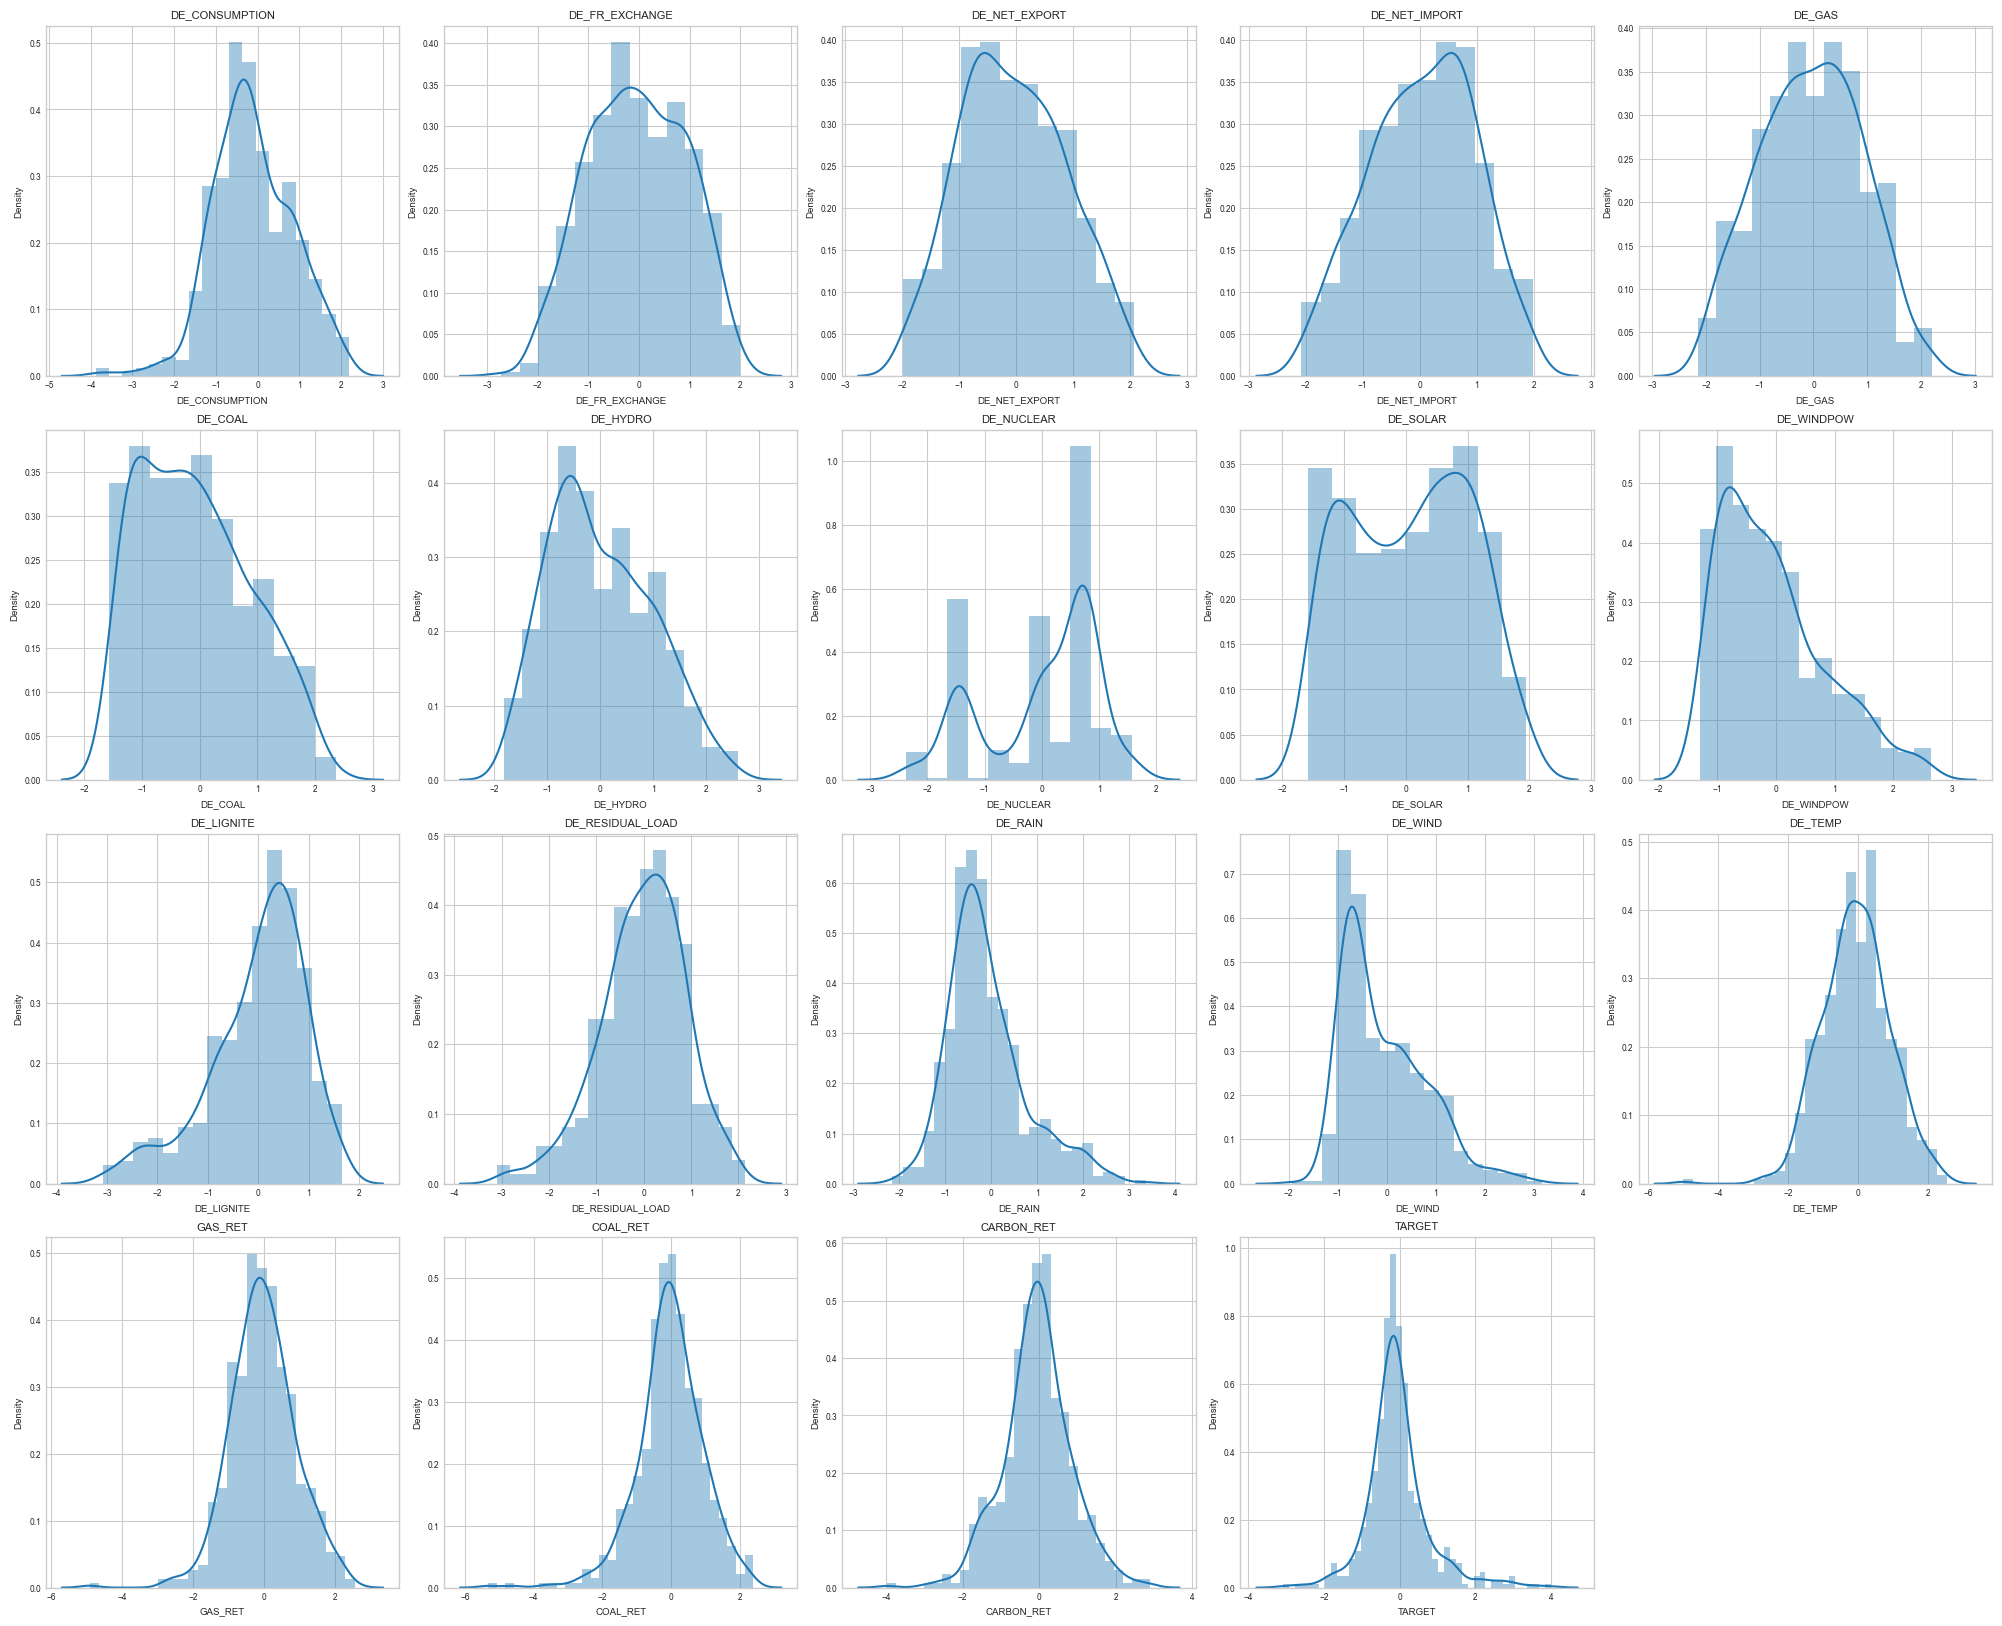

In [22]:
# remove the rows which has the outlier value in the column
outlier_train_DE = normalized_train_DE.drop(normalized_train_DE.idxmax(axis=0))
for i in range(5):
    outlier_train_DE = outlier_train_DE.drop(outlier_train_DE.idxmax(axis=0))
plt.figure(figsize=(20, 20))
for i, col in enumerate(outlier_train_DE.columns):
    plt.subplot(5, 5, i+1)
    sns.distplot(outlier_train_DE[col])
    plt.title(col)
plt.tight_layout()
plt.show()

In [23]:
X_raw_FR = outlier_train_FR.drop(['TARGET', 'FR_NET_IMPORT'], axis=1)
y_raw_FR = outlier_train_FR['TARGET']

# choose the features with the highest absolute correlation with the target
corr = X_raw_FR.corrwith(y_raw_FR)
corr = abs(corr).sort_values(ascending=False)[:10]

X_FR = X_raw_FR[corr.index]
y_FR = y_raw_FR

X_FR.tail()

,CARBON_RET,FR_WINDPOW,GAS_RET,FR_SOLAR,FR_HYDRO,FR_RAIN,FR_CONSUMPTION,FR_GAS,FR_NUCLEAR,FR_COAL
1486,0.292845,-0.707292,0.230720,0.488548,-0.517064,2.594496,-0.788015,-0.235104,-1.589732,-0.693386
1488,0.879488,0.572233,-0.413788,-0.191602,0.717993,-0.233683,1.344647,0.564511,1.384404,1.052464
1489,-0.214975,-0.535717,-0.020316,0.987104,-1.015521,-0.268055,-0.588014,0.246961,-1.115112,-0.727699
1492,0.127745,1.649784,-0.131585,-0.857630,1.679357,0.399091,1.357584,1.245870,0.597872,0.186424
1493,0.107799,-1.119481,0.658664,0.333335,0.584599,0.695454,-0.436984,-0.444577,-0.125139,1.446566


## 

In [24]:
# import linear regression model (Base Line)
from sklearn.linear_model import LinearRegression

k = 8
test_size = X_FR.shape[0] // k

best_score = 0
best_n_estimators = 0
for n_estimators in range(0, 1):
    avg_score_val = 0
    avg_score_train = 0
    print('n_estimators: {}'.format(n_estimators))
    for i in range(k):
        # split the data into 5 pieces and use one piece as test data
        X_test = X_FR.iloc[i*test_size:(i+1)*test_size]
        y_test = y_FR.iloc[i*test_size:(i+1)*test_size]
        X_train = pd.concat([X_FR.iloc[:i*test_size], X_FR.iloc[(i+1)*test_size:]])
        y_train = pd.concat([y_FR.iloc[:i*test_size], y_FR.iloc[(i+1)*test_size:]])

        # train the random forest model
        gbr = LinearRegression()
        gbr.fit(X_train, y_train)
        y_pred = gbr.predict(X_test) 

        # evaluate the model
        score = spearmanr(y_pred, y_test).correlation * 100
        avg_score_val += score
        # print('(Validation) Score on {}th fold: {:.2f}'.format(i+1, score))
        y_pred_train = gbr.predict(X_train)
        score = spearmanr(y_pred_train, y_train).correlation * 100
        avg_score_train += score
        # print('(Train) Score on {}th fold: {:.2f}'.format(i+1, score))

    avg_score_val /= k
    avg_score_train /= k
    print('Average score on validation data: {:.2f}'.format(avg_score_val))
    print('Average score on train data: {:.2f}'.format(avg_score_train))
    if avg_score_val > best_score:
        best_score = avg_score_val
        best_n_estimators = n_estimators

print('Best score on validation data: {:.2f}'.format(best_score))
print('Best n_estimators: {}'.format(best_n_estimators))

n_estimators: 0
Average score on validation data: 16.60
Average score on train data: 21.76
Best score on validation data: 16.60
Best n_estimators: 0


In [25]:
# import SVR
from sklearn.svm import SVR

def SVRegression(df, y_df, C=10, epsilon=0.01):
    model = SVR(kernel='linear', C=C, epsilon=epsilon)
    model.fit(df, y_df)
    return model

C = 20
epsilon = 0.1
k = 10
test_size = X_FR.shape[0] // k

best_score = 0
best_C = 0
for C in range(1, 30, 1):
    avg_score_val = 0
    avg_score_train = 0
    print('C: {}'.format(C))
    for i in range(k):
        # split the data into 5 pieces and use one piece as test data
        X_test = X_FR.iloc[i*test_size:(i+1)*test_size]
        y_test = y_FR.iloc[i*test_size:(i+1)*test_size]
        X_train = pd.concat([X_FR.iloc[:i*test_size], X_FR.iloc[(i+1)*test_size:]])
        y_train = pd.concat([y_FR.iloc[:i*test_size], y_FR.iloc[(i+1)*test_size:]])

        # train the random forest model
        model = SVRegression(X_train, y_train, C, epsilon)
        y_pred = model.predict(X_test) 

        # evaluate the model
        score = spearmanr(y_pred, y_test).correlation * 100
        avg_score_val += score
        # print('(Validation) Score on {}th fold: {:.2f}'.format(i+1, score))
        y_pred_train = model.predict(X_train)
        score = spearmanr(y_pred_train, y_train).correlation * 100
        avg_score_train += score
        # print('(Train) Score on {}th fold: {:.2f}'.format(i+1, score))

    avg_score_val /= k
    avg_score_train /= k
    print('Average score on validation data: {:.2f}'.format(avg_score_val))
    print('Average score on train data: {:.2f}'.format(avg_score_train))
    if avg_score_val > best_score:
        best_score = avg_score_val
        best_C = C

print('Best score on validation data: {:.2f}'.format(best_score))
print('Best C: {}'.format(best_C))

C: 1
Average score on validation data: 21.19
Average score on train data: 25.12
C: 2
Average score on validation data: 21.15
Average score on train data: 25.11
C: 3
Average score on validation data: 21.15
Average score on train data: 25.12
C: 4
Average score on validation data: 21.08
Average score on train data: 25.12
C: 5
Average score on validation data: 21.17
Average score on train data: 25.12
C: 6
Average score on validation data: 21.12
Average score on train data: 25.12
C: 7
Average score on validation data: 21.13
Average score on train data: 25.11
C: 8
Average score on validation data: 21.18
Average score on train data: 25.12
C: 9
Average score on validation data: 21.16
Average score on train data: 25.11
C: 10
Average score on validation data: 21.11
Average score on train data: 25.12
C: 11
Average score on validation data: 21.16
Average score on train data: 25.12
C: 12
Average score on validation data: 20.97
Average score on train data: 25.12
C: 13
Average score on validation dat

In [26]:
best_SVR_FR = SVR(kernel='linear', C=best_C, epsilon=epsilon)


### For German Data

In [27]:
X_raw_DE = normalized_train_DE.drop(['TARGET', 'DE_NET_IMPORT'], axis=1)
y_raw_DE = normalized_train_DE['TARGET']

# choose the features with the highest absolute correlation with the target
corr = X_raw_DE.corrwith(y_raw_DE)
corr = abs(corr).sort_values(ascending=False)[:10]

X_DE = X_raw_DE[corr.index]
y_DE = y_raw_DE

X_DE.tail()

,DE_RESIDUAL_LOAD,DE_NET_EXPORT,DE_WINDPOW,DE_GAS,DE_WIND,DE_HYDRO,DE_COAL,DE_LIGNITE,DE_FR_EXCHANGE,DE_CONSUMPTION
1480,-1.237932,-1.386164,-0.035614,-1.022607,-0.744380,-0.458350,-1.395724,-2.857613,-1.041110,-2.292337
1484,-1.480337,1.136315,1.538127,-0.580958,-0.063744,-0.479727,-1.042389,-1.921155,0.834461,0.913570
1487,0.166139,-0.269495,-0.679502,0.680250,0.238883,0.936900,0.421362,0.747548,0.608022,-0.488936
1490,-0.752810,0.204204,-0.374070,-0.686944,1.054690,-0.966822,-0.305483,0.366083,-0.099110,-0.624901
1491,0.992829,0.710795,0.352457,1.140126,-0.590684,-1.251066,-0.253901,1.093523,-0.287017,1.507154


In [28]:
# import linear regression model (Base Line)
from sklearn.linear_model import LinearRegression

k = 8
test_size = X_DE.shape[0] // k

best_score = 0
best_n_estimators = 0
for n_estimators in range(0, 1):
    avg_score_val = 0
    avg_score_train = 0
    print('n_estimators: {}'.format(n_estimators))
    for i in range(k):
        # split the data into 5 pieces and use one piece as test data
        X_test = X_DE.iloc[i*test_size:(i+1)*test_size]
        y_test = y_DE.iloc[i*test_size:(i+1)*test_size]
        X_train = pd.concat([X_DE.iloc[:i*test_size], X_DE.iloc[(i+1)*test_size:]])
        y_train = pd.concat([y_DE.iloc[:i*test_size], y_DE.iloc[(i+1)*test_size:]])

        # train the random forest model
        gbr = LinearRegression()
        gbr.fit(X_train, y_train)
        y_pred = gbr.predict(X_test) 

        # evaluate the model
        score = spearmanr(y_pred, y_test).correlation * 100
        avg_score_val += score
        # print('(Validation) Score on {}th fold: {:.2f}'.format(i+1, score))
        y_pred_train = gbr.predict(X_train)
        score = spearmanr(y_pred_train, y_train).correlation * 100
        avg_score_train += score
        # print('(Train) Score on {}th fold: {:.2f}'.format(i+1, score))

    avg_score_val /= k
    avg_score_train /= k
    print('Average score on validation data: {:.2f}'.format(avg_score_val))
    print('Average score on train data: {:.2f}'.format(avg_score_train))
    if avg_score_val > best_score:
        best_score = avg_score_val
        best_n_estimators = n_estimators

print('Best score on validation data: {:.2f}'.format(best_score))
print('Best n_estimators: {}'.format(best_n_estimators))

n_estimators: 0
Average score on validation data: 37.71
Average score on train data: 41.17
Best score on validation data: 37.71
Best n_estimators: 0


In [29]:
# import SVR
from sklearn.svm import SVR

def SVRegression(df, y_df, C=10, epsilon=0.01):
    model = SVR(kernel='linear', C=C, epsilon=epsilon)
    model.fit(df, y_df)
    return model

C = 20
epsilon = 0.1
k = 10
test_size = X_DE.shape[0] // k

best_score = 0
best_C = 0
for C in range(1, 10, 1):
    avg_score_val = 0
    avg_score_train = 0
    print('C: {}'.format(C))
    for i in range(k):
        # split the data into 5 pieces and use one piece as test data
        X_test = X_DE.iloc[i*test_size:(i+1)*test_size]
        y_test = y_DE.iloc[i*test_size:(i+1)*test_size]
        X_train = pd.concat([X_DE.iloc[:i*test_size], X_DE.iloc[(i+1)*test_size:]])
        y_train = pd.concat([y_DE.iloc[:i*test_size], y_DE.iloc[(i+1)*test_size:]])

        # train the random forest model
        model = SVRegression(X_train, y_train, C, epsilon)
        y_pred = model.predict(X_test) 

        # evaluate the model
        score = spearmanr(y_pred, y_test).correlation * 100
        avg_score_val += score
        # print('(Validation) Score on {}th fold: {:.2f}'.format(i+1, score))
        y_pred_train = model.predict(X_train)
        score = spearmanr(y_pred_train, y_train).correlation * 100
        avg_score_train += score
        # print('(Train) Score on {}th fold: {:.2f}'.format(i+1, score))

    avg_score_val /= k
    avg_score_train /= k
    print('Average score on validation data: {:.2f}'.format(avg_score_val))
    print('Average score on train data: {:.2f}'.format(avg_score_train))
    if avg_score_val > best_score:
        best_score = avg_score_val
        best_C = C

print('Best score on validation data: {:.2f}'.format(best_score))
print('Best C: {}'.format(best_C))

C: 1
Average score on validation data: 39.59
Average score on train data: 40.42
C: 2
Average score on validation data: 39.64
Average score on train data: 40.45
C: 3
Average score on validation data: 39.75
Average score on train data: 40.46
C: 4
Average score on validation data: 39.74
Average score on train data: 40.46
C: 5
Average score on validation data: 39.70
Average score on train data: 40.47
C: 6
Average score on validation data: 39.73
Average score on train data: 40.46
C: 7
Average score on validation data: 39.69
Average score on train data: 40.47
C: 8
Average score on validation data: 39.68
Average score on train data: 40.47
C: 9
Average score on validation data: 39.67
Average score on train data: 40.47
Best score on validation data: 39.75
Best C: 3


In [30]:
best_SVR_DE = SVR(kernel='linear', C=best_C, epsilon=epsilon)

## Merge the Validation

In [31]:
FR_features = X_FR.columns
DE_features = X_DE.columns

k = 5
test_size = filled_train.shape[0] // k

train_X_all = filled_train.drop(['TARGET'], axis=1)
train_y_all = filled_train['TARGET']

best_C_FR = 28
best_C_DE = 5
epsilon = 0.1

for i in range(k):
    # split the data into 5 pieces and use one piece as test data
    X_test = train_X_all.iloc[i*test_size:(i+1)*test_size]
    y_test = train_y_all.iloc[i*test_size:(i+1)*test_size]
    X_train = pd.concat([train_X_all.iloc[:i*test_size], train_X_all.iloc[(i+1)*test_size:]])
    y_train = pd.concat([train_y_all.iloc[:i*test_size], train_y_all.iloc[(i+1)*test_size:]])

    # if the country is FR, then build the X_train_FR and X_test_FR
    X_train_FR = X_train[X_train['COUNTRY']=='FR'][FR_features]
    y_train_FR = y_train[X_train['COUNTRY']=='FR']
    X_test_FR = X_test[X_test['COUNTRY']=='FR'][FR_features]
    y_test_FR = y_test[X_test['COUNTRY']=='FR']

    # if the country is DE, then build the X_train_DE and X_test_DE
    X_train_DE = X_train[X_train['COUNTRY']=='DE'][DE_features]
    y_train_DE = y_train[X_train['COUNTRY']=='DE']
    X_test_DE = X_test[X_test['COUNTRY']=='DE'][DE_features]
    y_test_DE = y_test[X_test['COUNTRY']=='DE']

    # train the random forest model
    model_FR = SVRegression(X_train_FR, y_train_FR, best_C_FR, epsilon)
    model_DE = SVRegression(X_train_DE, y_train_DE, best_C_DE, epsilon)
    y_pred_FR = model_FR.predict(X_test_FR)
    y_pred_DE = model_DE.predict(X_test_DE)

    # Combine the prediction of FR and DE
    y_pred = np.zeros(y_test.shape)
    y_pred[X_test['COUNTRY']=='FR'] = y_pred_FR
    y_pred[X_test['COUNTRY']=='DE'] = y_pred_DE

    # evaluate the model
    score = spearmanr(y_pred, y_test).correlation * 100
    avg_score_val += score
    # print('(Validation) Score on {}th fold: {:.2f}'.format(i+1, score))
    # y_pred_train = model.predict(X_train)
    # score = spearmanr(y_pred_train, y_train).correlation * 100
    # avg_score_train += score
    # print('(Train) Score on {}th fold: {:.2f}'.format(i+1, score))

avg_score_val /= k
# avg_score_train /= k
print('Average score on validation data: {:.2f}'.format(avg_score_val))
# print('Average score on train data: {:.2f}'.format(avg_score_train))


Average score on validation data: 38.20


## Build the final model

In [216]:
best_SVR_FR = SVRegression(X_FR, y_FR, best_C_FR, epsilon)
best_SVR_DE = SVRegression(X_DE, y_DE, best_C_DE, epsilon)

## Final Run on the test dataset

In [215]:
# read the test data
raw_X_test = pd.read_csv('./x_test.csv')

raw_X_test.fillna(raw_X_test.mean(), inplace=True)

In [219]:
# predict the target of the test data based on the country and the corresponding model
y_pred = np.zeros(raw_X_test.shape[0])
y_pred[raw_X_test['COUNTRY']=='FR'] = best_SVR_FR.predict(raw_X_test[raw_X_test['COUNTRY']=='FR'][FR_features])
y_pred[raw_X_test['COUNTRY']=='DE'] = best_SVR_DE.predict(raw_X_test[raw_X_test['COUNTRY']=='DE'][DE_features])

# create the submission file
submission = pd.DataFrame({'ID': raw_X_test['ID'], 'TARGET': y_pred})
submission.to_csv('trading_new_hands.csv', index=False)